In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
bank_df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter03/data/bank-additional/bank-additional-full.csv',
                     sep=';')
bank_df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [3]:
bank_df.shape

(41188, 21)

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
numerical_features = bank_df.select_dtypes('number').columns
categorical_features = bank_df.select_dtypes('O').columns

In [9]:
bank_df[numerical_features].describe().T

count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp.var.rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons.price.idx  41188.0    93.575664    0.578840    92.201    93.075   
cons.conf.idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr.employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.749    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr.employed     5191.000  5228.100  5228.100

In [10]:
bank_df[categorical_features].describe().T

count unique                top   freq
job          41188     12             admin.  10422
marital      41188      4            married  24928
education    41188      8  university.degree  12168
default      41188      3                 no  32588
housing      41188      3                yes  21576
loan         41188      3                 no  33950
contact      41188      2           cellular  26144
month        41188     10                may  13769
day_of_week  41188      5                thu   8623
poutcome     41188      3        nonexistent  35563
y            41188      2                 no  36548

In [22]:
bank_df.isna().sum().sum()

0

### Distribution of Numerical Features

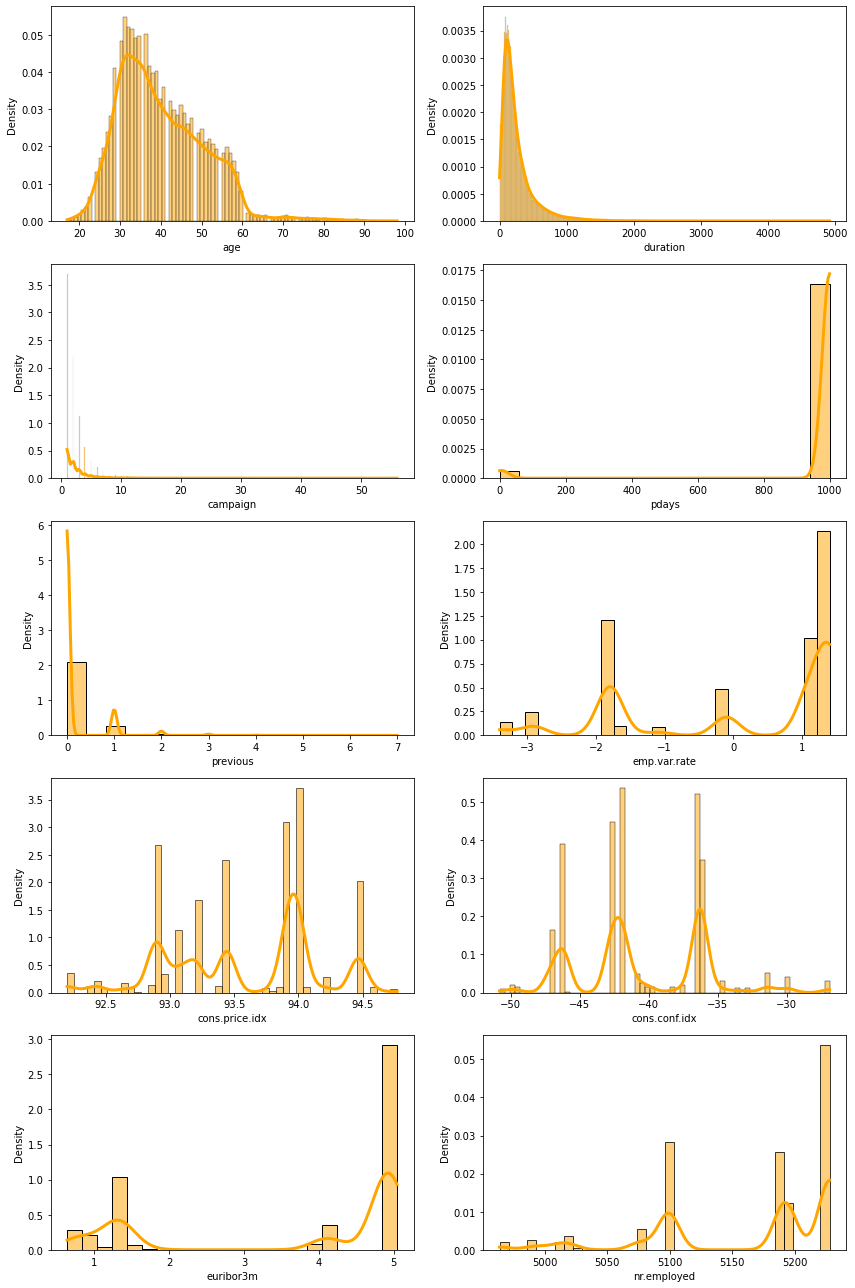

In [19]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))

axs = np.ravel(axs)

for i, col in enumerate(numerical_features):
    plt.sca(axs[i])
    sns.histplot(data=bank_df, x=col, stat='density', kde=True, fill=True, color='orange', line_kws={'color':'red', 'lw':3})
  
plt.tight_layout()
plt.show()

- From the preceding plot, we can see that, besides the age and duration columns, the rest of the numerical features do not seem to have a regular distribution of values since their distributions seem scattered and only a few values are present.

### Distribution of categorical features

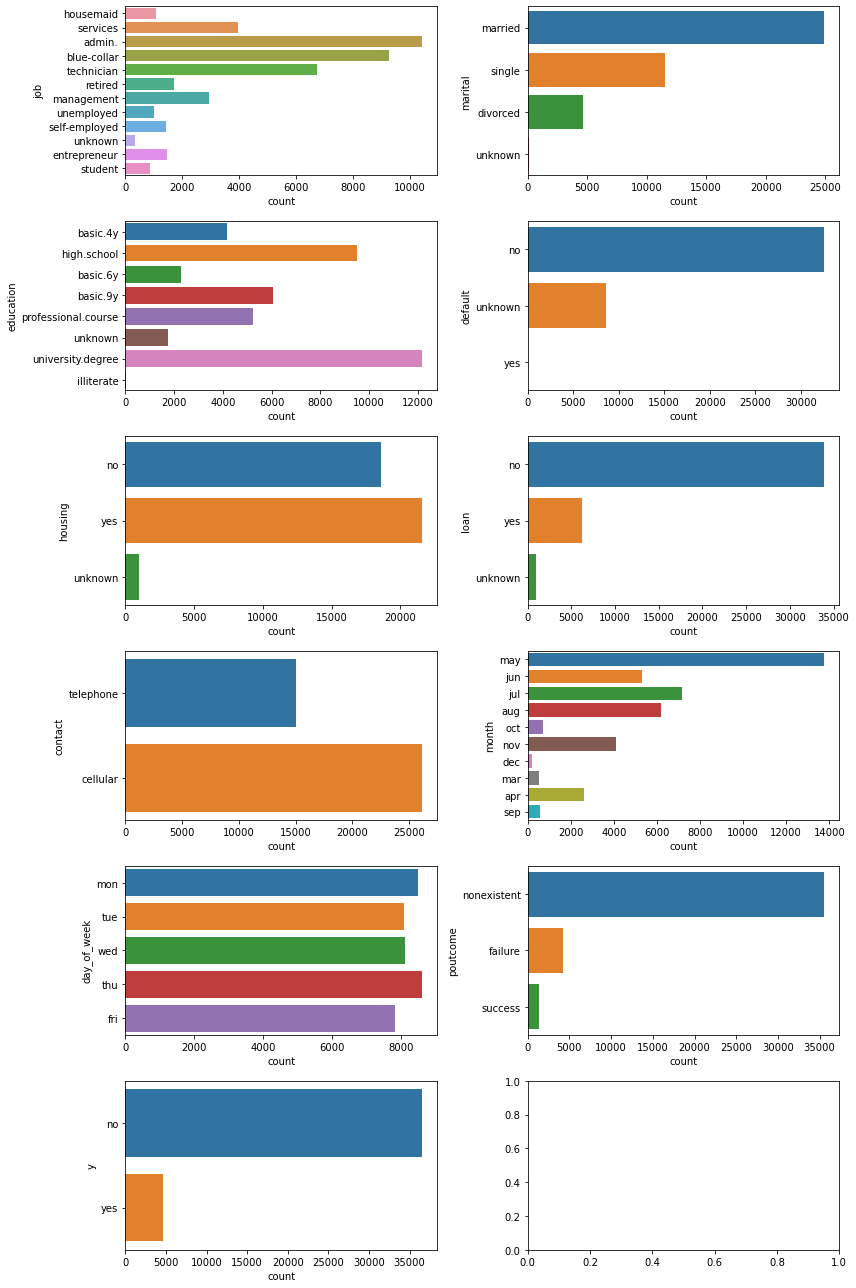

In [28]:
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(12, 18))

axs = np.ravel(axs)

for i, col in enumerate(categorical_features):
    plt.sca(axs[i])
    sns.countplot(data=bank_df, y=col)
  
plt.tight_layout()
plt.show()

In [31]:
bank_df['y'].value_counts(normalize=True)*100

no     88.734583
yes    11.265417
Name: y, dtype: float64

- Only 11% of contacted customers decided to accept the offer

## Impact of Numerical Features on the Outcome

- We will start our analysis by addressing the following question: Is there a statistically significant difference in numerical features for successful and non-successful marketing campaigns?

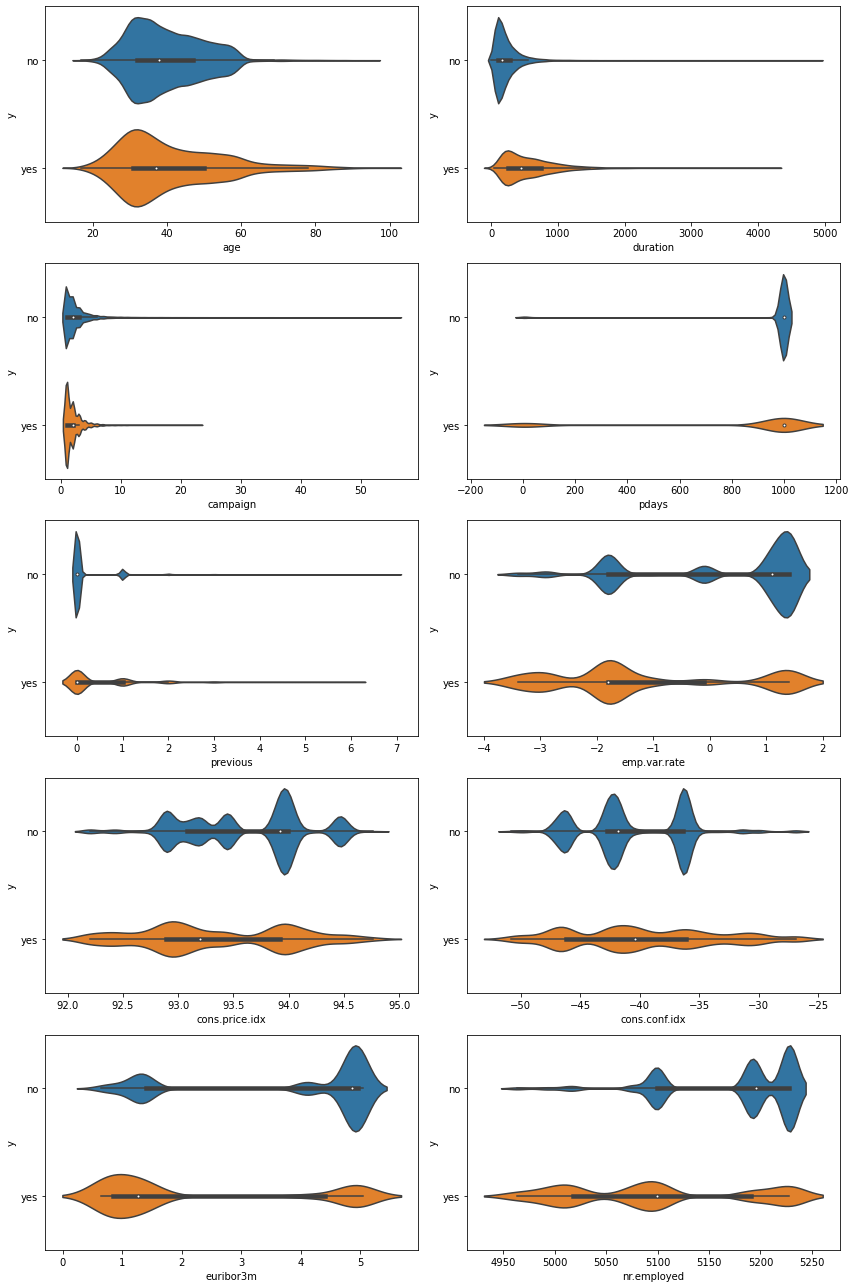

In [32]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))

axs = np.ravel(axs)

for i, col in enumerate(numerical_features):
    plt.sca(axs[i])
    sns.violinplot(data=bank_df, x=col, y='y')
  
plt.tight_layout()
plt.show()

In [46]:
hypothesis_df = pd.DataFrame(columns=['column', 'yes_mean', 'no_mean', 'ttest_stat', 'pval'])

for i, col in enumerate(numerical_features):
    yes_data = bank_df[col][bank_df.y=='yes']
    no_data = bank_df[col][bank_df.y=='no']
    
    test_res = stats.ttest_ind(yes_data, no_data)
    hypothesis_df.loc[i] = [col, round(yes_data.mean(),3), round(no_data.mean(),3), round(test_res[0],3), round(test_res[1],3)]

In [47]:
hypothesis_df

column  yes_mean   no_mean  ttest_stat  pval
0             age    40.913    39.911       6.172   0.0
1        duration   553.191   220.845      89.967   0.0
2        campaign     2.052     2.633     -13.497   0.0
3           pdays   792.036   984.114     -69.722   0.0
4        previous     0.493     0.132      48.003   0.0
5    emp.var.rate    -1.233     0.249     -63.434   0.0
6  cons.price.idx    93.354    93.604     -27.903   0.0
7   cons.conf.idx   -39.790   -40.593      11.154   0.0
8       euribor3m     2.123     3.811     -65.647   0.0
9     nr.employed  5095.116  5176.167     -76.984   0.0

- there is a statistically significant difference in the mean values for each of the numerical columns (the results from the p-value in the ttest pval column). This means that for each of the numerical features, the average value for successful marketing campaigns is significantly different than the average value for unsuccessful marketing campaigns.

In [52]:
ks_test_df = pd.DataFrame(columns=['column', 'kstest_stat', 'pval'])

for i, col in enumerate(numerical_features):
    yes_data = bank_df[col][bank_df.y=='yes']
    no_data = bank_df[col][bank_df.y=='no']
    
    ks_res = stats.ks_2samp(yes_data, no_data)
    ks_test_df.loc[i] = [col, round(ks_res[0],3), round(ks_res[1], 3)]

In [53]:
ks_test_df

column  kstest_stat  pval
0             age        0.086   0.0
1        duration        0.464   0.0
2        campaign        0.081   0.0
3           pdays        0.193   0.0
4        previous        0.210   0.0
5    emp.var.rate        0.432   0.0
6  cons.price.idx        0.228   0.0
7   cons.conf.idx        0.200   0.0
8       euribor3m        0.433   0.0
9     nr.employed        0.432   0.0

- From the preceding figure, we can also observe that the distributions of the various numerical features present a significant difference between successful and unsuccessful marketing campaigns.

In [54]:
# create arrays containing campaign and financial columns
campaign_columns = ["age", "duration", "campaign", "previous"]
financial_columns = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]

In [56]:
campaign_data = bank_df[campaign_columns + ['y']]
financial_data = bank_df[financial_columns + ['y']]

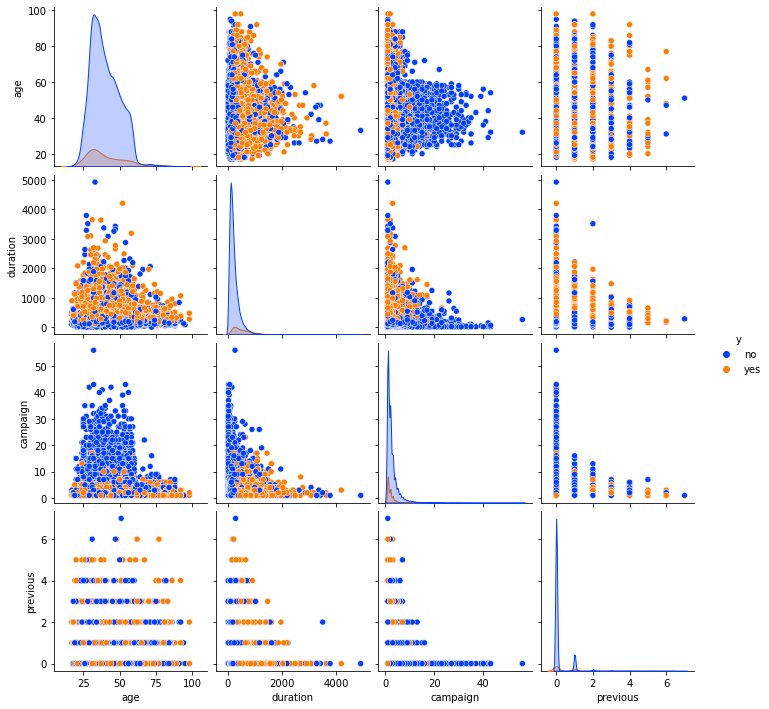

In [57]:
sns.pairplot(data=campaign_data, hue='y', palette='bright')
plt.show()

- From the preceding figure, we can immediately see that, in the previous column, most of the successful marketing campaigns were with newly contacted customers, while a substantial peak is present for customers who were contacted the second time, but without success.

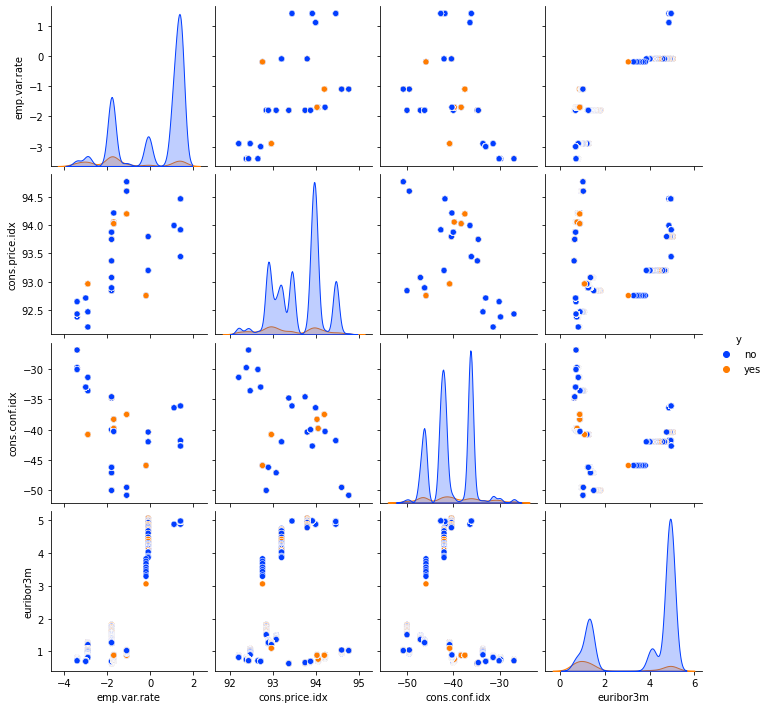

In [58]:
sns.pairplot(data=financial_data, hue='y', palette='bright')
plt.show()

- Interestingly, for lower values for the 3-month interest rates (the euribor3m column), the number of successful marketing calls is larger than the number of unsuccessful ones. The inverse situation happens when interest rates are higher. A possible explanation for this phenomenon is customer optimism when interest rates are lower.

### Correlation

In [59]:
sucessful_calls = bank_df['y']=='yes'

successful_data = bank_df[campaign_columns + financial_columns][sucessful_calls]
unsucessful_data = bank_df[campaign_columns + financial_columns][~sucessful_calls]

corr_mat_success = successful_data.corr()
corr_mat_unsuccess = unsucessful_data.corr()

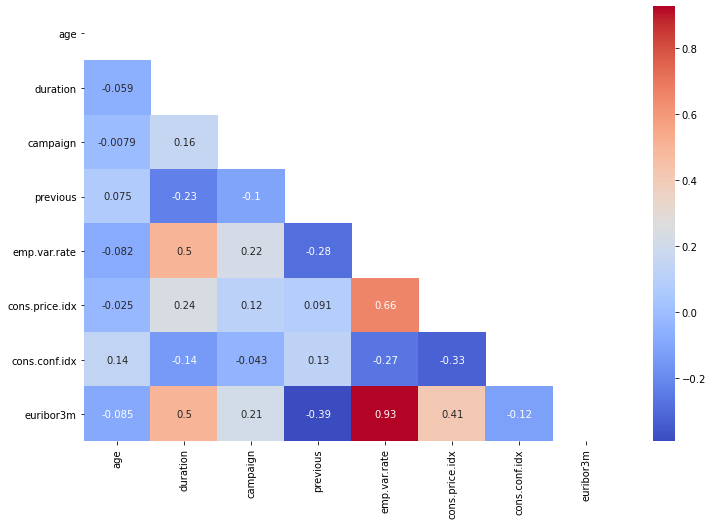

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat_success, annot=True, fmt='.2g', mask=np.triu(corr_mat_success), cmap='coolwarm')
plt.show()

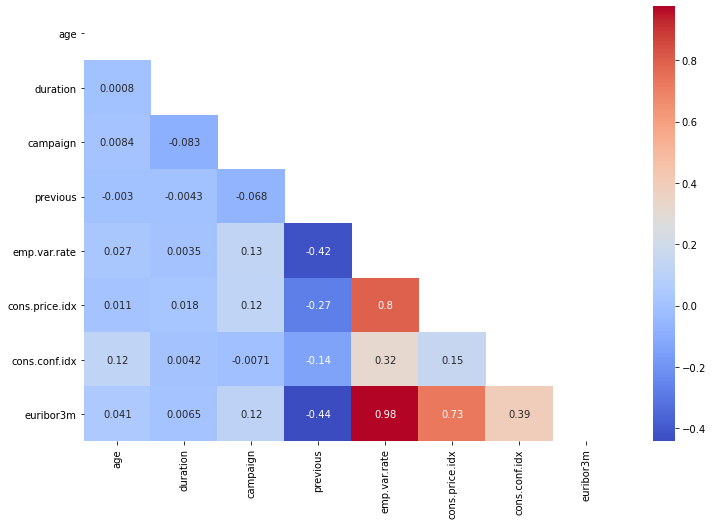

In [64]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat_unsuccess, annot=True, fmt='.2g', mask=np.triu(corr_mat_unsuccess), cmap='coolwarm')
plt.show()

- As we can observe from the preceding two figures, the correlation between euribor3m and emp.var.rate is very high (approximately 0.93 for successful and 0.98 for unsuccessful calls). That is quite an interesting phenomenon as the first one relates to the average interest rate at which European banks lend money to other banks with a maturity of 3 months, while the second one relates to the employment variation, that is, the rate at which people are hired or fired in an economy.

> **A high positive correlation of the cons.price.idx column with the emp.var.rate and euribor3m columns is a clear indicator of an expanding economy, in which growing employment means more people with money—hence more spending and higher inflation. In such situations, central banks tend to increase interest rates (in order to keep inflation under control), which is totally in line with our observation of increasing the euribor3m column.**